# Plot Risk Bound
---

### Number of Samples (N)
Once the number of training samples, $N$, is set then, we consider two scenarios:
- if ``N_is_Small==True``: $N$ ranges from $\lfloor N/10 \rfloor$ to $N$
- if ``N_is_Small==True``: $N$ ranges from $N^3$ to $N^4$

In [1]:
N = 1*(10**3)
N_is_Small = True

## Geometry of $\mathcal{X}\times \mathcal{Y}$: 
### Set the Rate at Which Embedding Distorts Geometry in As a Function of Euclidean Dimension

We consider four possible cases (``distortion_type``):
1. Worst-case (expander graph-type geometries): see paper and results of Bourgain.
2. Latent Full Binary-Tree Structure: [Gupta - Embedding Tree Metrics into Low-Dimensional Euclidean Spaces (2000); Theorem 4.1](https://link.springer.com/article/10.1007/s004540010020)
    If $\mathcal{X}\times \mathcal{Y}$ has a hierarchical structure; in that its metric is induced by a full binary tree; then Distortion 
    $$
    \tau(\phi) \le 4\,\pi*L^{1/(F-1)}\, \sqrt{\min\{F,\log(L)\}}
    ;
    $$ where $L=(k+1)/2$ for $F\in \mathbb{N}_+,\, F>1$.
3. Subsets of Euclidean space: see paper and results of Johnson and Lindentrauss as well as Matousek; roughly speaking when $k$ points can be bi-Lipschitz embedding into $\mathbb{R}^{\mathcal{O}(\log(k))}$ with low-distortion.  
4. Subspaces (metric) of the real line: $\tau(\phi)=1$.

In [2]:
distortion_type = 1

### The Structure of $\mathcal{X}$ - k vs. N

In [3]:
# Cube or no Cube?
cube_k = False

#### Case 1: Packing of the Cube $[0,1]^d$ by $k$ Points

$\mathcal{X}\subset [0,1]^d$ is a packing of $k$ points.  A simple computation shows that
$$
\operatorname{sep}(\mathcal{X})
=
    \frac{
        k^{1/d}
    }{
        2
    }
.
$$

#### Case 2: Either we set k manually or we consider the no. Points Needed to Pack a Cube:

From [George G. Lorentz, Manfred v. Golitschek, and Yuly Makovoz. Constructive approximation - Proposition 1.3](https://link.springer.com/book/9783642646102) the packing number of $[0,\operatorname{diam}]^d$ in $\ell_{\infty}^d$ by $\ell_{\infty}^d$-balls of radius $10^{-p}$ is no more than
$$
k \ge 
\Big\lceil
2^{-d}
        \,
        \Big(10^{p}*\operatorname{diam}\Big)^d
\Big\rceil
$$
we use this lower-bound to compute $k$.

### Worst-Case Lipschitz Constant

The next bit of code sets the Lipschitz constant; there are two options:
- Set Lipschitz Constant Manually (consider small classes... there is no good benchmark in this case) ``Set_Lip_Constant==True``.
- Compute Worst-Case Lipschitz constant (there are fair classical benchmarks in this case) ``Set_Lip_Constant==False``.

In [4]:
Set_Lip_Constant = False
Lip_Constant_Manual = 1

### In the Case of Worst-Case Lipschitz Constants, it is computed as follows:

We will use a worst-case Lipschitz constant; so large that it counts all functions from $\mathbb{R}^d_{p,1}\cap [0,1]^d$ to $\{0,1\}$.  For a fair comparison with the Occam's razor bound.

In the case of a grid in $[0,1]^d$ with spacing $10^{-p}$ we have:
$$
    \operatorname{Lip}(f)
= 
    \sup_{x,z\in \mathcal{X};\,x\neq x}\, 
    \frac{
        d_{\mathcal{Y}}(f(x),f(z))
    }{
        d_{\mathcal{X}}(x,z)
    }
\le 
    \frac{
    \operatorname{diam(\mathcal{Y})}
    }{
    \operatorname{sep}(\mathcal{X})
    }
=
    \frac{
    1
%     \operatorname{diam}\sqrt{d}
    }{10^{-p}}
=
%     \operatorname{diam}\sqrt{d}\,
    10^{p}
$$
In the case where $\mathcal{X}\subset [0,1]^d$ consists of $k$ maximally spaced (packing) points in $[0,1]^d$ we compute
$
\operatorname{sep}(\mathcal{X}) = \frac1{
2\, k^{1/d}
}
$.  Therefore, the maximal Lipschitz constant of any binary function on $\mathcal{X}$ is at-most
$$
    \operatorname{Lip}(f)
= 
    \sup_{x,z\in \mathcal{X};\,x\neq x}\, 
    \frac{
        d_{\mathcal{Y}}(f(x),f(z))
    }{
        d_{\mathcal{X}}(x,z)
    }
\le 
    \frac{
    \operatorname{diam(\mathcal{X})}
    }{
    \operatorname{sep}(\mathcal{X})
    }
=
    \frac{
    1
%         \operatorname{diam}\sqrt{d}
    }{
    \operatorname{sep}(\mathcal{X})
    }
\le
    \frac{
    1
%         \sqrt{d}
    }{
    (2
    k^{1/d})^{-1}
    }
=
    2
%     \,
%     \sqrt{d}
    \,
    k^{1/d}
.
$$

In [5]:
# If Manual 
k_manual = 1*(10**5)

# If Cube
diam = 1*(10**0)
d = 1*(10**2); print('Prototypical Space: [0,'+str(diam)+']^'+str(d))
p = 1*(10**1); print('Distance Between Points on the Grid: '+str(10**-p))

%run ./SupportFiles/Compute_N_points.ipynb

Prototypical Space: [0,1]^100
Distance Between Points on the Grid: 1e-10
We Consider The Worst-Case Lipschitz Constant: 2.2440369086039267
Number of points:1.00e+05


## Import Packages and Set Global Hyperparameters

In [6]:
%run ./SupportFiles/Dependancies.ipynb
print('---')

Dependancies and Packages Loaded
---


# Set Global Parameters

## Are we Computing Risk Bounds or Concentration Bounds (in $\mathcal{W}_1$)?
- For Risk Bounds set: True
- For Concentration Bounds set: False

In [7]:
Risk_or_Concentration = True
Isometric_Embedding = True

#### Decide on How Many Points to Use?

Load Global hyperparameters, now that internal parameters have been defined.

In [8]:
%run ./SupportFiles/Global_Hyperparameters.ipynb
print('---')

Results are to Hold with Probability at-least: 95.0%
Max Representation Space Dimension (F aka m): 4.605170185988092
---


---

#### Load helper functions.

In [9]:
print('---')
%run ./SupportFiles/Helper_Functions.ipynb
print('---')

---
Helper Functions Loaded
---


# The Risk Bound Computers

We compare our risk bound against the following binary classification benchmarks.

## Benchmark: Trivial VC/Occam Bound (Binary Classification)
From the The (Quantitative) Fundamental Theorem of Statistical Learning ([Theorem 6.8 in "Understanding Machine Learning" (with extra details in Section 28.1)](https://scholar.google.com/citations?view_op=view_citation&hl=en&user=kezPqwoAAAAJ&citation_for_view=kezPqwoAAAAJ:XiVPGOgt02cC)
$$
\begin{aligned}
    \sup_{f \in \{0,1\}^{\mathcal{X}}}
    \,
    |\mathcal{R}(f) - \hat{\mathcal{R}}(f)|
\le &
    n^{-1/2}
    (
        128 \operatorname{VC-dim}\log(n+1) + \log(8/\delta)
    )^{1/2}
\\ 
\le & 
    n^{-1/2}
    (
        128 \#\mathcal{X}\log(n+1) + \log(8/\delta)
    )^{1/2}
\end{aligned}
$$
where we use the fact that $\operatorname{VC-dim}(2^{\mathcal{X}})\le \log_2(\#2^{\mathcal{X}})=\#\mathcal{X}$.

## Agnostic PAC Bound


From [Corollary 4.6 of "Understanding Machine Learning"](https://scholar.google.com/citations?view_op=view_citation&hl=en&user=kezPqwoAAAAJ&citation_for_view=kezPqwoAAAAJ:XiVPGOgt02cC) we have the following agnostic PAC learnability bound
$$
    \sup_{f \in \{0,1\}^{\mathcal{X}}}
    \,
    |\mathcal{R}(f) - \hat{\mathcal{R}}(f)|
\le 
\begin{aligned}
    (2n)^{-1/2}
    \log\big(
    2 \times 2^k/\delta
    \big)^{1/2}
    = 
    (2n)^{-1/2}
     \big(
     \log(2/\delta) + k\log(2)
     \big)^{1/2}
\end{aligned}
$$

## Generate Plot

#### Decide on Scale of Sample Size (Range: Small N or Large N)

In [10]:
# Indices
Freq_plot = 10**2
if N_is_Small:
    indexing_set = range(1,10**5,Freq_plot)
else:
#     indexing_set = range(3,10000,Freq_plot)
    indexing_set = range(1,10,1)

In [11]:
Print_Occam = True
Agnostic_PAC_Bound = True

**Note**: If ``Set_Lip_Constant==True`` then we *do not* benchmark against the VC or Agnostic PAC bounds.

---

Load risk bound functions.

In [12]:
%run ./SupportFiles/Risk_Bound_Engine.ipynb

Risk Bounds Loaded


---

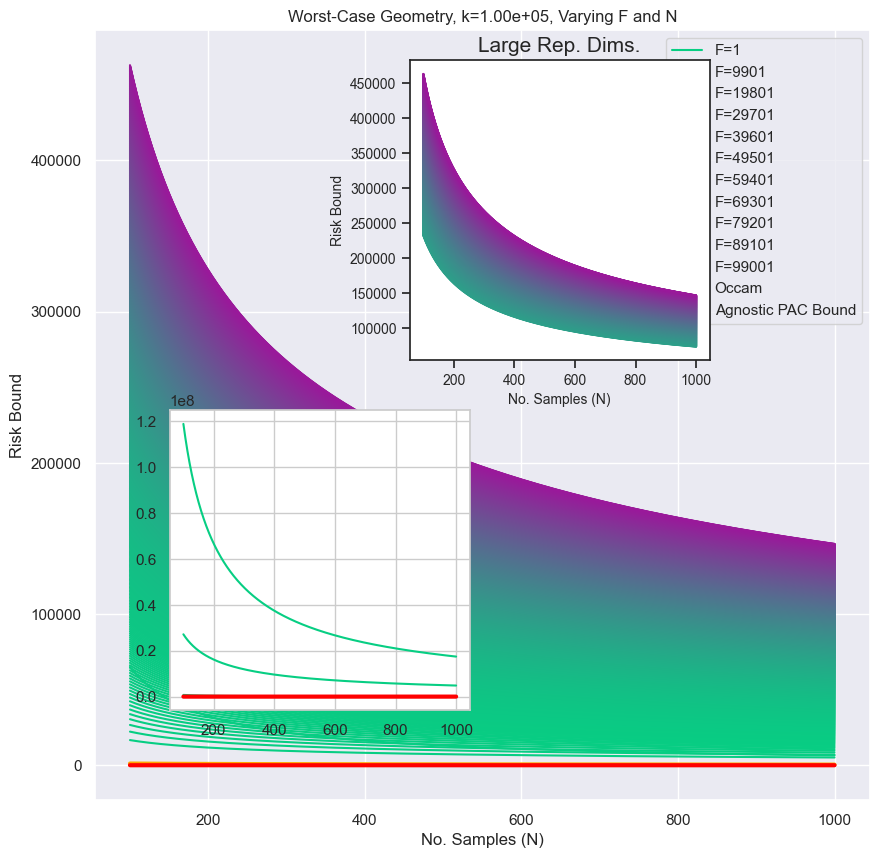

In [13]:
ax = plt.figure(figsize=(10,10))
sns.set_style("darkgrid")

plt.title(''+dist_name+', k='+str('{:.2e}'.format(k))+', Varying F and N')
    

plt.xlabel('No. Samples (N)')
plt.ylabel('Risk Bound')# on $\sup_{f\in \mathcal{F}}\,|\mathcal{R}(\hat{f})-\hat{\mathcal{R}}(\hat{f})|$')
# plt.ylabel('Bound on $\mathbb{E}[\mathcal{W}_1(\mathbb{P},\mathbb{P}^N)]$')



# Set Max No Colours
n_col=max(indexing_set)+2


#### Plot Generation
for i in indexing_set:
    # Set Value of F
    F_global = int(np.round(i,0))
    
    # Write Function of N only
    def get_risk_bound__NVar_scalar(N):
        return get_risk_bound__scalar(k=k_global,F=F_global,N=N)
    
    get_risk_bound__NVar = np.vectorize(get_risk_bound__NVar_scalar)
    
    # Compute Risk Bound
    Risk_Bounds = get_risk_bound__NVar_scalar(N_sequence)

    
    # Plot
    col_index = (i-min(indexing_set))/(max(indexing_set)+1)
    # Plot Risk-Bound
    plot_ratio =int(max(indexing_set)/max(1,Freq_plot*10))  # plot small subset of rep. dims.
    if N_is_Small:
        # Ony write every other legend
        if i % plot_ratio == 1: 
            plt.plot(N_sequence, 
                 Risk_Bounds,
                 color=colorFader(c1,c2,col_index),
                 label = 'F='+str(F_global).format(i=i))
        else: # Remove legend on most plots
            plt.plot(N_sequence, 
                 Risk_Bounds,
                 color=colorFader(c1,c2,col_index),label='_nolegend_')
    else:
        #plot most of it for large N
        if i % 10 == 1: 
            plt.plot(N_sequence, 
                 Risk_Bounds,
                 color=colorFader(c1,c2,col_index),
                 label = 'F='+str(F_global).format(i=i))
        else: # Remove legend on most plots
            plt.plot(N_sequence, 
                 Risk_Bounds,
                 color=colorFader(c1,c2,col_index),label='_nolegend_')


### Classical Risk-Bounds for Binary Classification
if Y_is_bin_class == True:
    if Print_Occam:
        ###----------------###
        ### VC/Occam Bound ###
        ###----------------###
        # Write Function of N only
        def get_risk_bound__VC_scalar(N):
            return trivial_VCBound(N_in=N,k_in=k,delta = delta)
        get_risk_bound__VC = np.vectorize(get_risk_bound__VC_scalar)

        # Compute Risk Bound
        Risk_Bounds__VC = get_risk_bound__VC(N_sequence)

        # Plot Risk-Bound
        plt.plot(N_sequence,Risk_Bounds__VC,label = 'Occam',c='orange',linewidth=3)
    ###--------------------###
    ### Agnostic PAC Bound ###
    ###--------------------###
    if Agnostic_PAC_Bound:
        # Write Function of N only
        def get_risk_bound__Agnostic_PAC_Bound_scalar(N):
            return Agnostic_PAC_Bound(N_in=N,k_in=k,delta = delta)
        get_risk_bound__Agnostic_PAC_Bound = np.vectorize(get_risk_bound__Agnostic_PAC_Bound_scalar)

        # Compute Risk Bound
        Risk_Bounds__Agnostic_PAC_Bound = get_risk_bound__Agnostic_PAC_Bound(N_sequence)

        # Plot Risk-Bound
        plt.plot(N_sequence,Risk_Bounds__Agnostic_PAC_Bound,label = 'Agnostic PAC Bound',c='red',linewidth=3)

# plt.legend(loc=0) #'best'
plt.legend(loc=1) #'Upper right'
# plt.legend(loc=2) # 'Upper left'


# ------------------------------------------ #
# Our Best Risk-Bound  w. Agnostic PAC Bound #
# ------------------------------------------ #

sns.set_style("whitegrid")
axes1 = ax.add_axes([0.2, 0.2, 0.3, 0.3]) # inset axes (location first, size second)
# if N_is_Small:
#     axes1.set_title('High Dim. Rep.',fontsize=15)
# else:
#     axes1.set_title('Low Dim. Rep.',fontsize=15)


# Determined Reduced Indexing Set (Depending if bottom rep. spaces or top are better; i.e. if N is large or small)
if N_is_Small:
    # top 10 %
    indexing_set__reduced = indexing_set[-int(len(indexing_set)*.75):] # top 10%
else:
    # bottom 10 %
    if distortion_type > 2: # 1d reps not worth it in Euclidean case, so we use the 3d min
        indexing_set__reduced = indexing_set[:int(len(indexing_set)*.5)] # bottom 10%
        indexing_set__reduced = range(1,10,1)
    else:
        indexing_set__reduced = range(max(3,min(indexing_set)),max(indexing_set),Freq_plot)
        indexing_set__reduced = indexing_set__reduced[:int(len(indexing_set)*.5)] # bottom 10%

#### Plot Generation
for i in range(1,5):#in indexing_set__reduced:
    # Set Value of F
    F_global = int(np.round(i,0))
    
    # Write Function of N only
    def get_risk_bound__NVar_scalar(N):
        return get_risk_bound__scalar(k=k_global,F=F_global,N=N)
    
    get_risk_bound__NVar = np.vectorize(get_risk_bound__NVar_scalar)
    
    # Compute Risk Bound
    Risk_Bounds = get_risk_bound__NVar_scalar(N_sequence)

    
    # Plot
    col_index = (i-min(indexing_set))/(max(indexing_set)+1)
    plt.plot(N_sequence, Risk_Bounds,label = 'F='+str(F_global).format(i=i),color=colorFader(c1,c2,col_index))
    
#     plt.legend(loc=1) #'Upper right'

if Y_is_bin_class == True:
#     if Print_Occam:
#         ###----------------###
#         ### VC/Occam Bound ###
#         ###----------------###
#         # Write Function of N only
#         def get_risk_bound__VC_scalar(N):
#             return trivial_VCBound(N_in=N,k_in=k,delta = delta)
#         get_risk_bound__VC = np.vectorize(get_risk_bound__VC_scalar)

#         # Compute Risk Bound
#         Risk_Bounds__VC = get_risk_bound__VC(N_sequence)

#         # Plot Risk-Bound
#         plt.plot(N_sequence,Risk_Bounds__VC,label = 'Occam',c='orange',linewidth=3)
    if Agnostic_PAC_Bound:
        ###--------------------###
        ### Agnostic PAC Bound ###
        ###--------------------###
        # Write Function of N only
        def get_risk_bound__Agnostic_PAC_Bound_scalar(N):
            return Agnostic_PAC_Bound(N_in=N,k_in=k,delta = delta)
        get_risk_bound__Agnostic_PAC_Bound = np.vectorize(get_risk_bound__Agnostic_PAC_Bound_scalar)

        # Compute Risk Bound
        Risk_Bounds__Agnostic_PAC_Bound = get_risk_bound__Agnostic_PAC_Bound(N_sequence)

        # Plot Risk-Bound
        plt.plot(N_sequence,Risk_Bounds__Agnostic_PAC_Bound,label = 'Agnostic PAC Bound',c='red',linewidth=3)

# ---------------------------------------- #
# High Representation Space Dimension Only #
# ---------------------------------------- #
# if N_is_Small:
sns.set_style("ticks")
axes2 = ax.add_axes([0.44, 0.55, 0.3, 0.3]) # inset axes (location first, size second)
if N_is_Small:
    axes2.set_title('Large Rep. Dims.',fontsize=15)
else:
    axes2.set_title('Low Rep. Dims.',fontsize=15)

#### Plot Generation
for i in indexing_set__reduced:
    # Set Value of F
    F_global = int(np.round(i,0))

    # Write Function of N only
    def get_risk_bound__NVar_scalar(N):
        return get_risk_bound__scalar(k=k_global,F=F_global,N=N)

    get_risk_bound__NVar = np.vectorize(get_risk_bound__NVar_scalar)

    # Compute Risk Bound
    Risk_Bounds = get_risk_bound__NVar_scalar(N_sequence)


    # Plot
    col_index = (i-min(indexing_set))/(max(indexing_set)+1)
    plt.plot(N_sequence, Risk_Bounds,label = 'F='+str(F_global).format(i=i),color=colorFader(c1,c2,col_index))

    
    
plt.xlabel('No. Samples (N)',fontsize=10)
plt.ylabel('Risk Bound',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# ----------------------------------------------------- #

plt.savefig('Experiments/Risk_Bound_F/Vs_VCBound__k_'+str(N_is_Small)+'____'+str(dist_name__plot)+'___d____'+str(d)+'.pdf')
plt.show()

In [14]:
print('N Min: '+latex_float(N_min))
print('N Max: '+latex_float(N_max))
print('For Paper:')
print(latex_float(N_min)+'<N<'+latex_float(N_max))
print('dimension: '+latex_float(d))
print('N. Points (k): '+latex_float(k_manual))

N Min: 1 \times 10^{2}
N Max: 1 \times 10^{3}
For Paper:
1 \times 10^{2}<N<1 \times 10^{3}
dimension: 1 \times 10^{2}
N. Points (k): 1 \times 10^{5}


---
# Fin #
---

---

---